# Importing and Inspecting the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [5]:
# churn data
churn = pd.read_csv('churn_data.csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn.shape

(7043, 9)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [8]:
# customer_data
customer = pd.read_csv('customer_data.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
customer.shape

(7043, 5)

In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
# internet data
internet = pd.read_csv('internet_data.csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [12]:
internet.shape

(7043, 9)

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


## Merging 

In [14]:
# merging all three dataframes 
df = pd.merge(churn, customer, on = 'customerID', how = 'inner')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [15]:
merged_data = pd.merge(df, internet, on = 'customerID', how = 'inner')
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [16]:
pd.set_option('display.max_columns', 60)

In [17]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


We see there are no null values present in the data. We will inspect further to see if there are any values which might not have any meaning to the feature and remove it.

# EDA

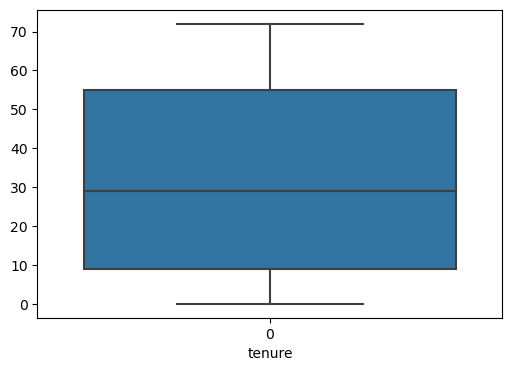

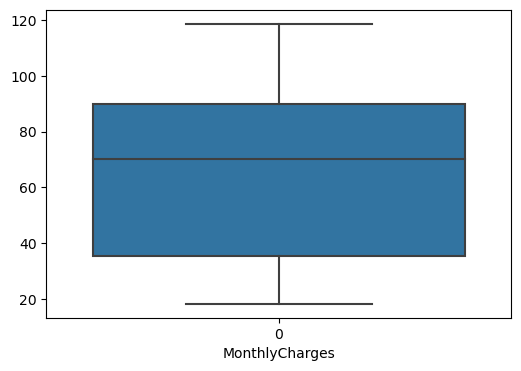

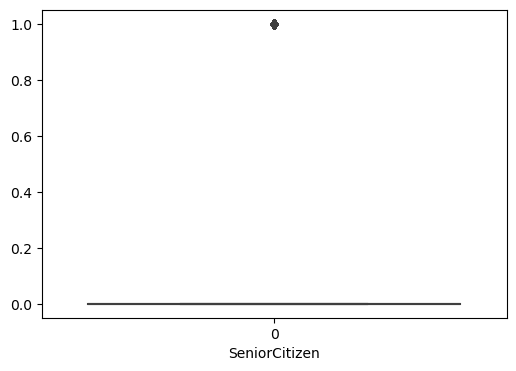

In [25]:
for var in merged_data.columns:
    if merged_data[var].dtype!='O':
        plt.figure(figsize=(6,4))
        sns.boxplot(merged_data[var])
        plt.xlabel(var)
        plt.show()

We see there are no outliers in the numerical variables 'tenure' and 'MonthlyCharges'. We will need to inspect 'TotalCharges', as it's data type is not numerical, We will convert it to numerical data type and further inspect it in later stage

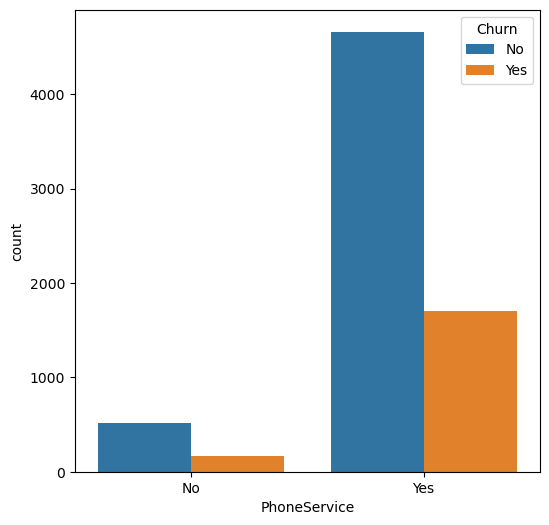

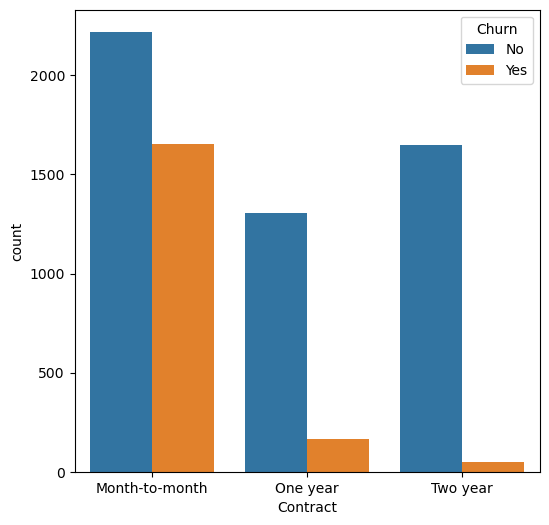

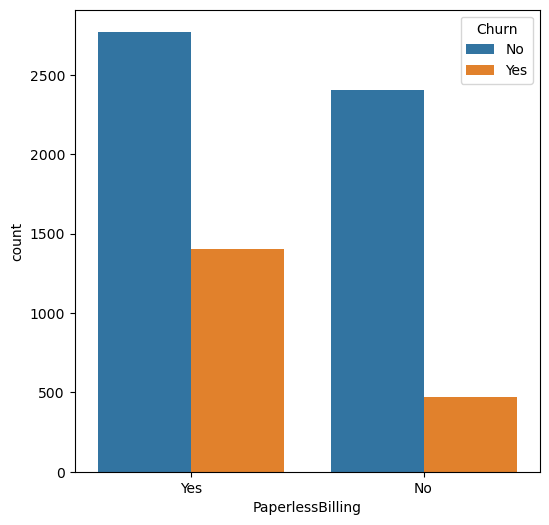

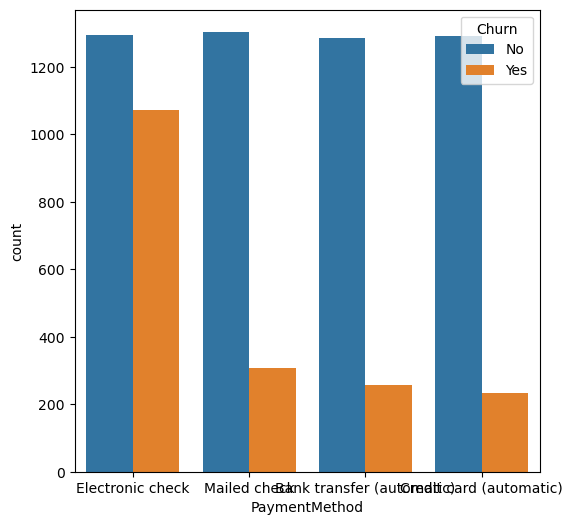

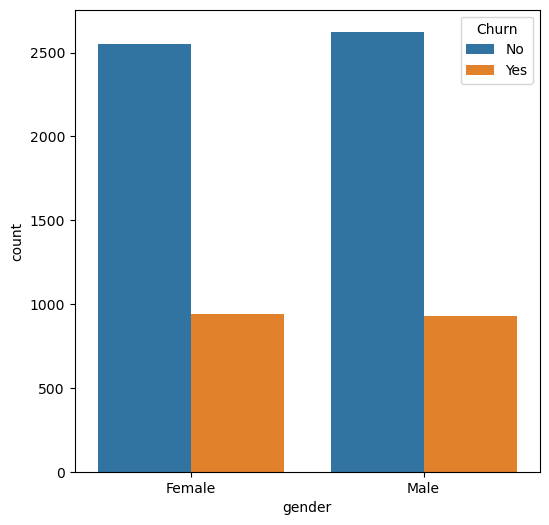

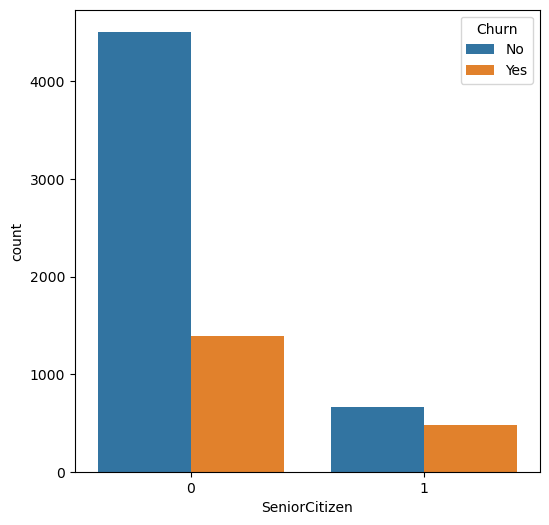

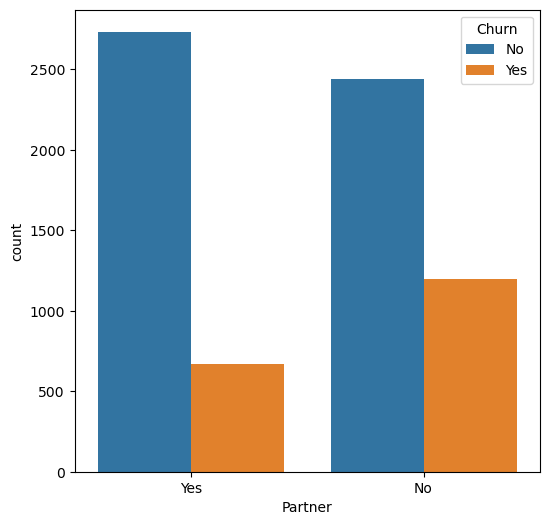

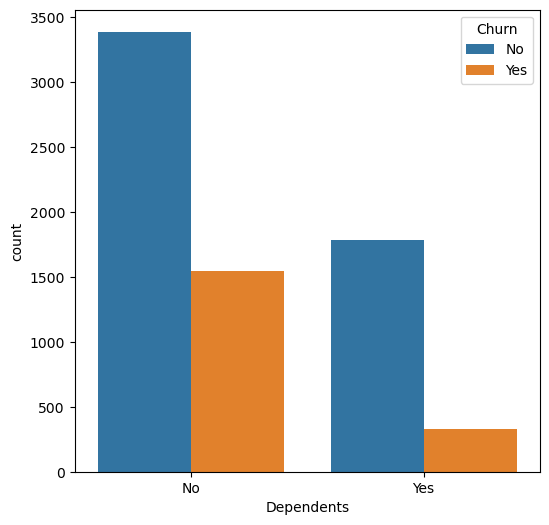

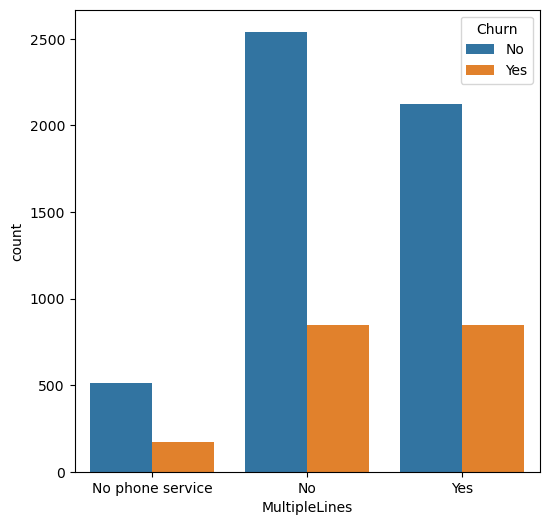

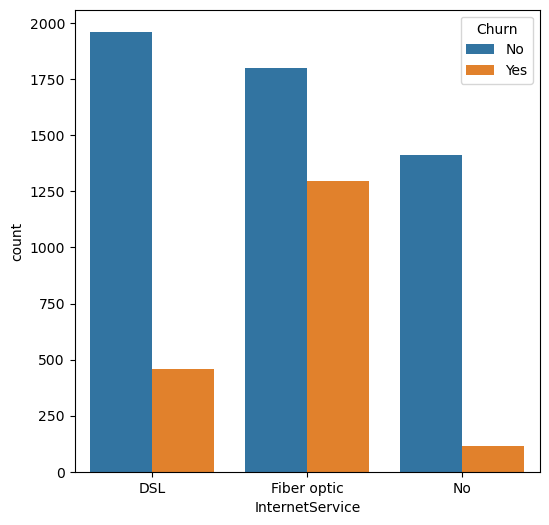

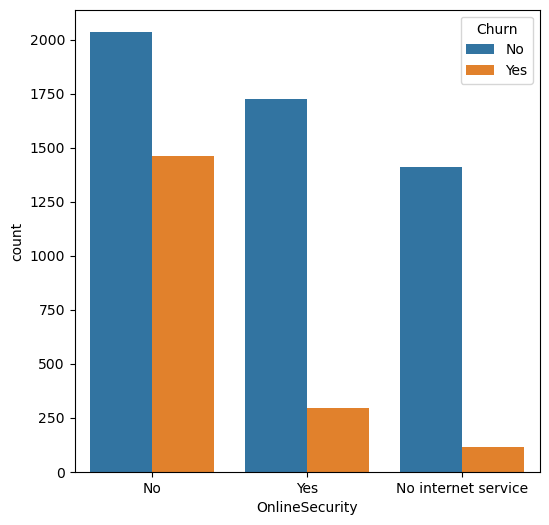

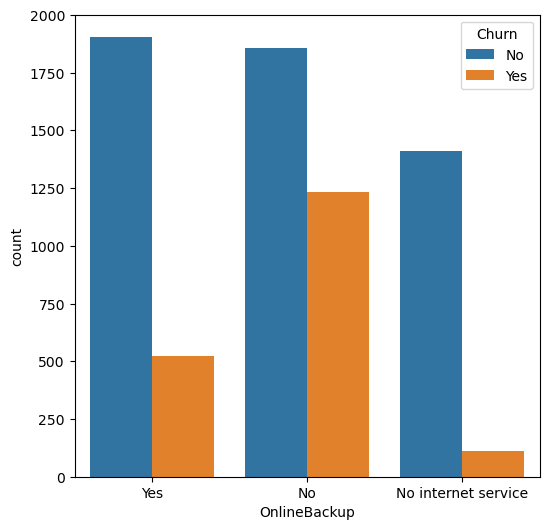

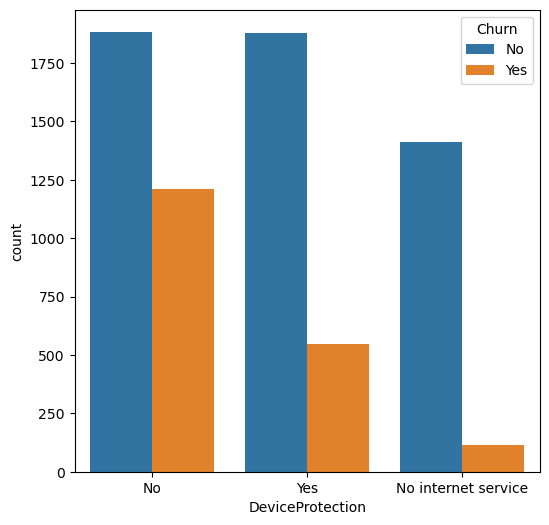

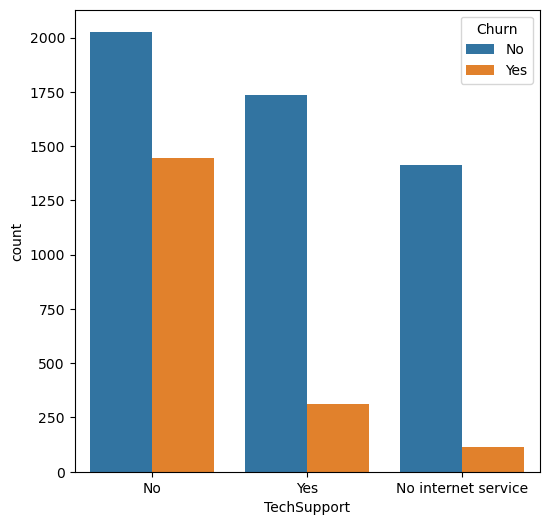

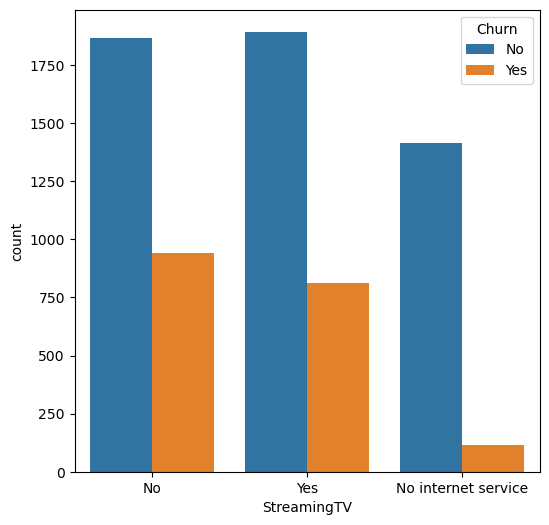

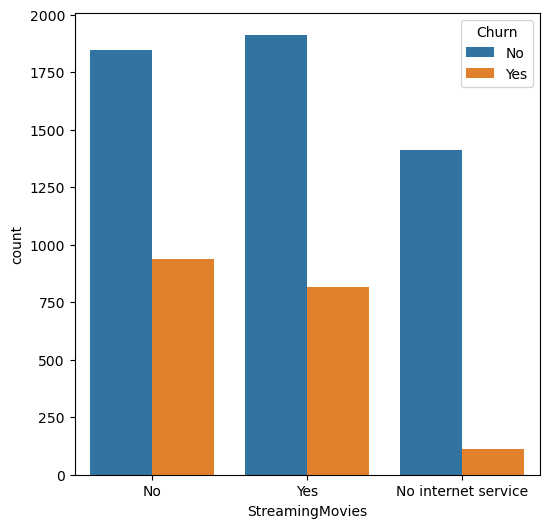

In [26]:
cat_var = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 
'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
'StreamingTV', 'StreamingMovies']
for var in cat_var:
    plt.figure(figsize=(6,6))
    sns.countplot(x = var, hue = 'Churn', data = merged_data)
    plt.xlabel(var)
    plt.show()

- We see customers having month-to-month contract churn more often then the ones having a year to two year contract. 
- Customers who have not opted for Online Backup, Device Protection and Tech Support churn more often. 

# Data Preprocessing 

In [27]:
merged_data.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Male,0,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [28]:
merged_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [29]:
for var in merged_data.columns:
    if merged_data[var].dtype!='int64' and merged_data[var].dtype!='float64':
        print(var)
        print(merged_data[var].value_counts())
        print('----------------------------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
----------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
----------------------------------
PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
----------------------------------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
----------------------------------
TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     

In [30]:
## Converting the columns with Binary values to 0/1
telecom = merged_data.copy()
var = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
telecom[var] = telecom[var].apply(lambda x: x.map({'Yes':1, 'No':0}))

In [31]:
telecom['gender'] = telecom['gender'].map({'Female':1, 'Male':0})

In [32]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,0,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,No,Fiber optic,No,No,No,No,No,No


### One hot encoding of categorical variables 

In [33]:
dummy_var = ['Contract', 'PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
dummies = pd.get_dummies(telecom[dummy_var])
telecom2 = pd.concat([telecom, dummies], axis = 1)


In [34]:
telecom2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,0,0,0,0,No,DSL,Yes,No,Yes,No,No,No,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,No,Fiber optic,No,No,No,No,No,No,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [35]:
# dropping one of dummy feature to avoid multicollinearity between features 

In [36]:
telecom3 = telecom2.drop(['customerID', 'Contract', 'PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_Two year', 'PaymentMethod_Mailed check',
                         'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                         'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis = 1)
                         
                

In [37]:
telecom3.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.5,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [38]:
telecom3.shape

(7043, 31)

In [39]:
telecom3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   PhoneService                             7043 non-null   int64  
 2   PaperlessBilling                         7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   object 
 5   Churn                                    7043 non-null   int64  
 6   gender                                   7043 non-null   int64  
 7   SeniorCitizen                            7043 non-null   int64  
 8   Partner                                  7043 non-null   int64  
 9   Dependents                               7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [40]:
# Converting 'TotalCharges' to numerical data type
telecom3['TotalCharges'] = pd.to_numeric(telecom3['TotalCharges'], errors = 'coerce')

In [41]:
round((telecom3.isnull().sum()/len(telecom3))*100,2)

tenure                                     0.00
PhoneService                               0.00
PaperlessBilling                           0.00
MonthlyCharges                             0.00
TotalCharges                               0.16
Churn                                      0.00
gender                                     0.00
SeniorCitizen                              0.00
Partner                                    0.00
Dependents                                 0.00
Contract_Month-to-month                    0.00
Contract_One year                          0.00
PaymentMethod_Bank transfer (automatic)    0.00
PaymentMethod_Credit card (automatic)      0.00
PaymentMethod_Electronic check             0.00
MultipleLines_No                           0.00
MultipleLines_Yes                          0.00
InternetService_DSL                        0.00
InternetService_Fiber optic                0.00
OnlineSecurity_No                          0.00
OnlineSecurity_Yes                      

In [42]:
telecom4 = telecom3.dropna() # dropping the null values in 'TotalCharges' variable

In [43]:
telecom4.shape

(7032, 31)

In [44]:
round((telecom4.isnull().sum()/len(telecom4))*100,2)

tenure                                     0.0
PhoneService                               0.0
PaperlessBilling                           0.0
MonthlyCharges                             0.0
TotalCharges                               0.0
Churn                                      0.0
gender                                     0.0
SeniorCitizen                              0.0
Partner                                    0.0
Dependents                                 0.0
Contract_Month-to-month                    0.0
Contract_One year                          0.0
PaymentMethod_Bank transfer (automatic)    0.0
PaymentMethod_Credit card (automatic)      0.0
PaymentMethod_Electronic check             0.0
MultipleLines_No                           0.0
MultipleLines_Yes                          0.0
InternetService_DSL                        0.0
InternetService_Fiber optic                0.0
OnlineSecurity_No                          0.0
OnlineSecurity_Yes                         0.0
OnlineBackup_

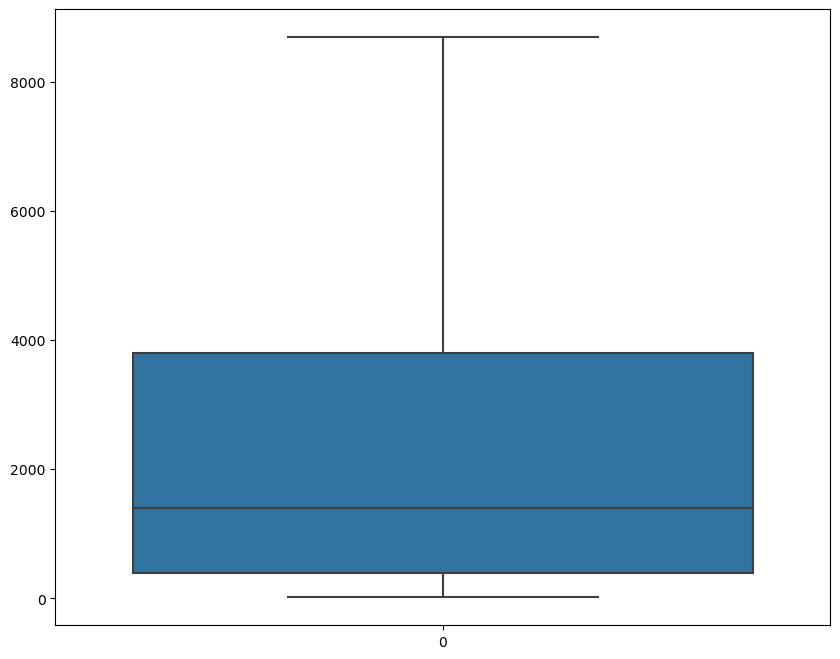

In [45]:
# Checking for outlier in 'TotalCharges'

plt.figure(figsize=(10,8))
sns.boxplot(telecom4['TotalCharges'])
plt.show()

We see there are no outliers present in this feature. 

In [982]:
# checking for Churn percentage 

In [46]:
round(telecom4.Churn.value_counts(normalize=True)*100, 2)

0    73.42
1    26.58
Name: Churn, dtype: float64

The churn rate in the given data is 26.6% approximately 

## Data Splitting in Train and Test set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = telecom4.drop('Churn', axis = 1)
y = telecom4.Churn

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [52]:
X_train.shape, X_test.shape

((5625, 30), (1407, 30))

In [988]:
# Scaling the features 

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
telecom4.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [56]:
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

In [57]:
X_train.tail()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3778,-1.195652,1,0,-0.473876,-0.944001,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
5199,0.760739,1,1,1.551230,1.513522,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1
5235,-0.951104,1,1,0.545306,-0.658247,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
5399,0.719981,1,0,-1.489743,-0.567911,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
862,-0.502764,1,1,0.296725,-0.358430,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0


In [58]:
X_test.tail()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1733,-1.277169,1,0,-1.512944,-0.996189,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5250,-0.828829,1,0,0.989437,-0.486450,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1
5465,-0.258215,1,1,-0.286611,-0.318825,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
5851,0.108609,1,1,1.528029,0.689219,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3984,1.616661,1,0,-1.312422,-0.184315,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Finding correlation between the features

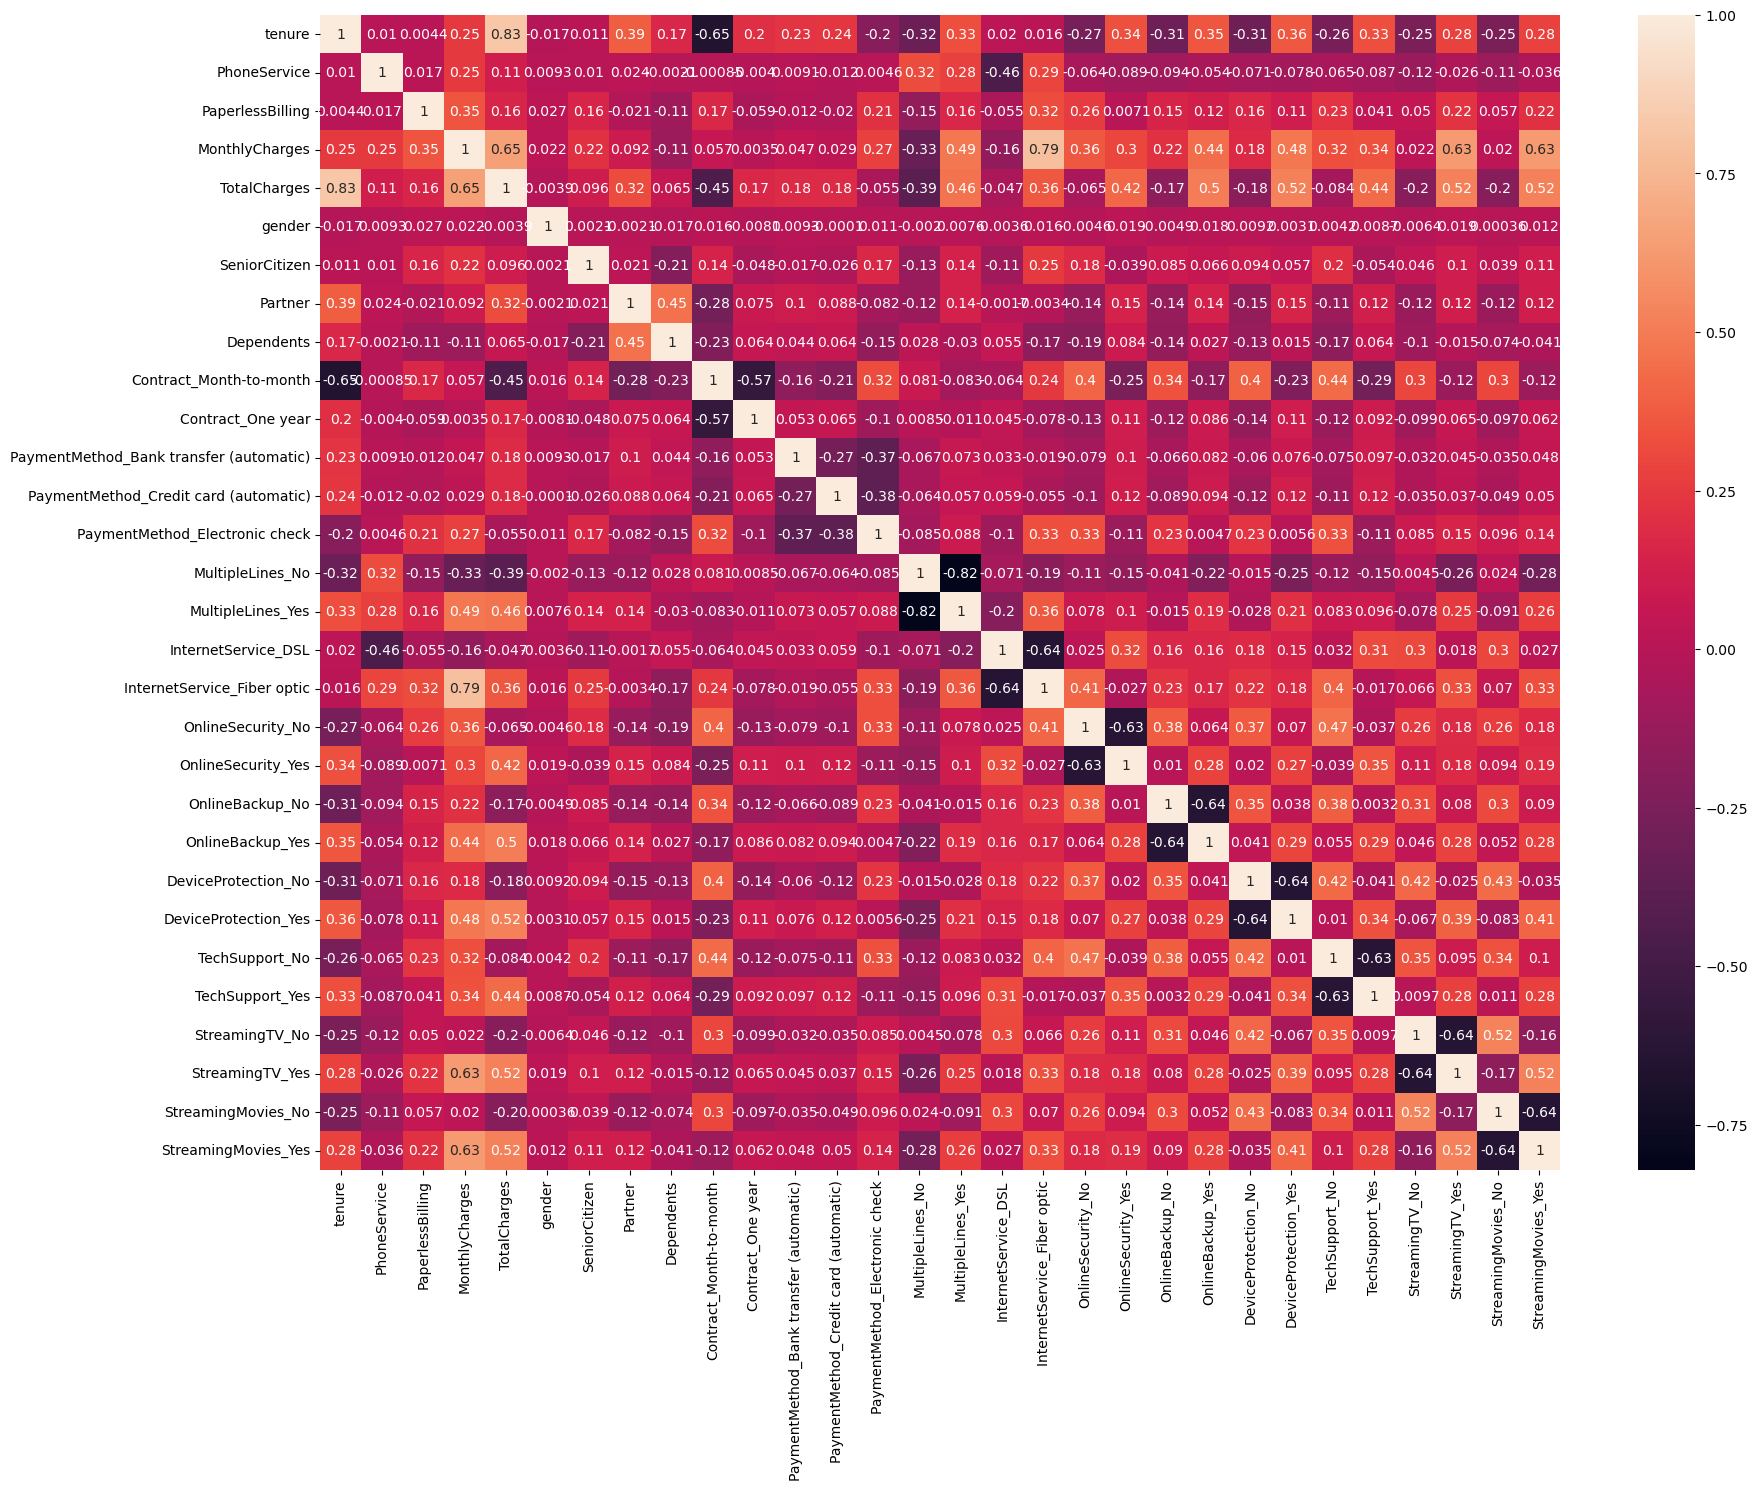

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [997]:
# dropping highly correlated variables 

In [60]:
X_train = X_train.drop(['Contract_One year', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis = 1)

X_test = X_test.drop(['Contract_One year', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis = 1)


In [61]:
X_train.shape, X_test.shape

((5625, 22), (1407, 22))

# Model Building

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [84]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

rfe = RFE(estimator = lr_model, n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 4),
 ('TotalCharges', True, 1),
 ('gender', False, 8),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 5),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [86]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Dependents', 'Contract_Month-to-month',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'gender', 'Partner',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [88]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [89]:
X_train_sm = sm.add_constant(X_train[col])

lr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model1 = lr.fit()

lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5609
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2315.6
Date:                Fri, 13 Jan 2023   Deviance:                       4631.3
Time:                        13:56:19   Pearson chi2:                 6.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.8347      0.207    -13.699      0.000      -3.240      -2.429
tenure                            -1.4667      0.165     -8.901      0.000      -1.790      -1.144
PhoneService                      -0.6080      0.149     -4.070      0.000      -0.901      -0.315
PaperlessBilling                   0.2758      0.083      3.314      0.001       0.113       0.439
TotalCharges                       0.6656      0.170      3.915      0.000       0.332       0.999
SeniorCitizen                      0.2749      0.095      2.902      0.004       0.089       0.461
Dependents                        -0.2037      0.092     -2.216      0.027      -0.384      -0.024
Contract_Month-to-month            0.9119      0.117      7.805      0.000       0.683       1.141
PaymentMethod_Electronic check     0.3345      0.078      4.284      0.000       0.181       0.488
MultipleLines_Yes                  0.2211      0.089      2.472      0.013       0.046       0.396
InternetService_DSL                0.7212      0.151      4.787      0.000       0.426       1.016
InternetService_Fiber optic        1.5191      0.152      9.967      0.000       1.220       1.818
OnlineSecurity_Yes                -0.4555      0.096     -4.761      0.000      -0.643      -0.268
TechSupport_Yes                   -0.4567      0.097     -4.726      0.000      -0.646      -0.267
StreamingTV_Yes                    0.2373      0.092      2.592      0.010       0.058       0.417
StreamingMovies_Yes                0.2523      0.091      2.766      0.006       0.074       0.431
==================================================================================================
"""

We see that for all the features p-value is less than 5%. So these are statistically significant variables. 

In [1007]:
# checking for multicollinearity

In [90]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.93
4,TotalCharges,9.37
1,tenure,6.56
11,InternetService_Fiber optic,4.58
10,InternetService_DSL,3.36
7,Contract_Month-to-month,2.24
14,StreamingTV_Yes,1.71
15,StreamingMovies_Yes,1.70
13,TechSupport_Yes,1.52
12,OnlineSecurity_Yes,1.48


In [91]:
y_train_pred = lr_model1.predict(X_train_sm)
y_train_pred[:10]

6030    0.243736
3410    0.393670
5483    0.290361
5524    0.010850
6337    0.091593
5284    0.715242
1327    0.190329
6741    0.720571
5931    0.771019
6766    0.041964
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24373553, 0.39367018, 0.29036125, 0.01085023, 0.09159289,
       0.7152419 , 0.19032947, 0.72057118, 0.77101852, 0.04196389])

In [1011]:
# Creating a dataframe with actual churn and churn probablities 

In [93]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,1,0.243736,6030
1,1,0.393670,3410
2,1,0.290361,5483
3,0,0.010850,5524
4,0,0.091593,6337


In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0 )
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,1,0.243736,6030,0
1,1,0.393670,3410,0
2,1,0.290361,5483,0
3,0,0.010850,5524,0
4,0,0.091593,6337,0


In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [96]:
cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
cm1

array([[3697,  433],
       [ 652,  843]])

In [97]:
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.8071111111111111

### Model 2

Dropping the variables with VIF greater than 5

In [98]:
col = col.drop('InternetService_Fiber optic')

X_train_sm = sm.add_constant(X_train[col])

lr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model2 = lr.fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5610
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2369.4
Date:                Fri, 13 Jan 2023   Deviance:                       4738.8
Time:                        13:57:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2706
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1718      0.192    -11.290      0.000      -2.549      -1.795
tenure                            -1.8518      0.157    -11.804      0.000      -2.159      -1.544
PhoneService                      -0.6982      0.152     -4.583      0.000      -0.997      -0.400
PaperlessBilling                   0.4379      0.081      5.416      0.000       0.279       0.596
TotalCharges                       1.1489      0.158      7.275      0.000       0.839       1.458
SeniorCitizen                      0.3705      0.094      3.960      0.000       0.187       0.554
Dependents                        -0.2388      0.090     -2.644      0.008      -0.416      -0.062
Contract_Month-to-month            1.1467      0.113     10.106      0.000       0.924       1.369
PaymentMethod_Electronic check     0.5063      0.075      6.722      0.000       0.359       0.654
MultipleLines_Yes                  0.3329      0.088      3.784      0.000       0.160       0.505
InternetService_DSL               -0.3421      0.101     -3.382      0.001      -0.540      -0.144
OnlineSecurity_Yes                -0.3666      0.097     -3.796      0.000      -0.556      -0.177
TechSupport_Yes                   -0.3980      0.098     -4.064      0.000      -0.590      -0.206
StreamingTV_Yes                    0.3262      0.092      3.557      0.000       0.146       0.506
StreamingMovies_Yes                0.3444      0.091      3.770      0.000       0.165       0.524
==================================================================================================
"""

In [99]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.65
4,TotalCharges,7.21
1,tenure,5.57
7,Contract_Month-to-month,2.08
13,StreamingTV_Yes,1.70
14,StreamingMovies_Yes,1.70
10,InternetService_DSL,1.62
12,TechSupport_Yes,1.51
11,OnlineSecurity_Yes,1.46
9,MultipleLines_Yes,1.43


In [100]:
y_train_pred = lr_model2.predict(X_train_sm)
y_train_pred[:10]

6030    0.237840
3410    0.358130
5483    0.259329
5524    0.006496
6337    0.070914
5284    0.766693
1327    0.172021
6741    0.692328
5931    0.767675
6766    0.061681
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23784027, 0.35812968, 0.25932873, 0.00649619, 0.07091449,
       0.76669271, 0.17202054, 0.6923278 , 0.76767505, 0.0616813 ])

In [102]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,1,0.237840,6030
1,1,0.358130,3410
2,1,0.259329,5483
3,0,0.006496,5524
4,0,0.070914,6337


In [103]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,1,0.237840,6030,0
1,1,0.358130,3410,0
2,1,0.259329,5483,0
3,0,0.006496,5524,0
4,0,0.070914,6337,0


In [104]:
cm2 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
cm2

array([[3742,  388],
       [ 714,  781]])

In [105]:
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.8040888888888889

We see accuracy score has not dropped significantly. 

### Model 3

In [106]:
col = col.drop('TotalCharges')

X_train_sm = sm.add_constant(X_train[col])

lr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model3 = lr.fit()

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5611
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2399.4
Date:                Fri, 13 Jan 2023   Deviance:                       4798.9
Time:                        13:58:56   Pearson chi2:                 5.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2628
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4648      0.183    -13.446      0.000      -2.824      -2.106
tenure                            -0.8532      0.060    -14.207      0.000      -0.971      -0.735
PhoneService                      -0.4852      0.146     -3.324      0.001      -0.771      -0.199
PaperlessBilling                   0.4623      0.080      5.770      0.000       0.305       0.619
SeniorCitizen                      0.4044      0.094      4.295      0.000       0.220       0.589
Dependents                        -0.2860      0.090     -3.186      0.001      -0.462      -0.110
Contract_Month-to-month            1.2034      0.110     10.897      0.000       0.987       1.420
PaymentMethod_Electronic check     0.5248      0.075      6.952      0.000       0.377       0.673
MultipleLines_Yes                  0.4558      0.086      5.313      0.000       0.288       0.624
InternetService_DSL               -0.5137      0.098     -5.264      0.000      -0.705      -0.322
OnlineSecurity_Yes                -0.2489      0.096     -2.590      0.010      -0.437      -0.061
TechSupport_Yes                   -0.2566      0.097     -2.642      0.008      -0.447      -0.066
StreamingTV_Yes                    0.5150      0.088      5.829      0.000       0.342       0.688
StreamingMovies_Yes                0.5328      0.088      6.057      0.000       0.360       0.705
==================================================================================================
"""

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.09
1,tenure,2.28
6,Contract_Month-to-month,2.03
9,InternetService_DSL,1.56
12,StreamingTV_Yes,1.51
13,StreamingMovies_Yes,1.51
11,TechSupport_Yes,1.39
8,MultipleLines_Yes,1.37
2,PhoneService,1.36
10,OnlineSecurity_Yes,1.33


In [108]:
y_train_pred = lr_model3.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [109]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,1,0.346208,6030
1,1,0.326262,3410
2,1,0.251299,5483
3,0,0.009054,5524
4,0,0.059006,6337


In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,1,0.346208,6030,0
1,1,0.326262,3410,0
2,1,0.251299,5483,0
3,0,0.009054,5524,0
4,0,0.059006,6337,0


In [111]:
cm3 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
cm3

array([[3751,  379],
       [ 752,  743]])

In [112]:
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.7989333333333334

Accuracy has dropped from 80.4% to 79.8% after dropping the feature. We see VIF for all the features is less than 5. We will go ahead and find other performance metrics.

### Metrics Beyond Accuracy 

In [113]:
TN = cm3[0,0] # True negative
TP = cm3[1,1] # True positive
FP = cm3[0,1] # False positive
FN = cm3[1,0] # False negative 

In [114]:
# Sensitivity 
sensitivity = TP/float(FN+TP)
sensitivity

0.49698996655518396

In [115]:
# specificity 
specificity = TN/float(TN+FP)
specificity

0.9082324455205811

In [116]:
# False Positive rate (FPR) - predicting churn when customer has not churned 
FPR = FP/float(TN+FP)
FPR

0.09176755447941888

In [117]:
# Positive predictive value 
TP/float(TP+FP)

0.6622103386809269

In [118]:
# Negative Predictive value 
TN/float(TN+FN)

0.8330002220741728

## Plotting the ROC curve

In [119]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve(ROC Curve)')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

In [121]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

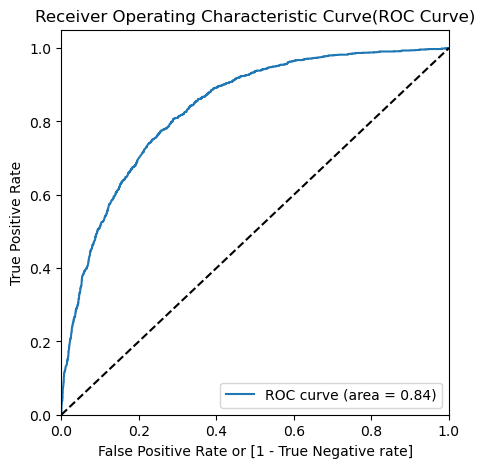

In [122]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

After plotting the ROC curve, we are getting the AUC score as 0.84. So, our model performance is decent. 

## Finding optimal threshold point 

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.346208,6030,0,1,1,1,1,0,0,0,0,0,0
1,1,0.326262,3410,0,1,1,1,1,0,0,0,0,0,0
2,1,0.251299,5483,0,1,1,1,0,0,0,0,0,0,0
3,0,0.009054,5524,0,1,0,0,0,0,0,0,0,0,0
4,0,0.059006,6337,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns= ['prob', 'accuracy', 'sensitivity', 'specificity'])

num = [0.0, 0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in num:
    cm = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1])/total
    
    specificity = cm[0,0]/float(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/float(cm[1,0]+cm[1,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.265778     1.000000     0.000000
0.1   0.1  0.612978     0.938462     0.495157
0.2   0.2  0.698489     0.862876     0.638983
0.3   0.3  0.751289     0.772575     0.743584
0.4   0.4  0.787733     0.636789     0.842373
0.5   0.5  0.798933     0.496990     0.908232
0.6   0.6  0.787556     0.328428     0.953753
0.7   0.7  0.766933     0.175251     0.981114
0.8   0.8  0.747733     0.059532     0.996852
0.9   0.9  0.735111     0.003344     1.000000


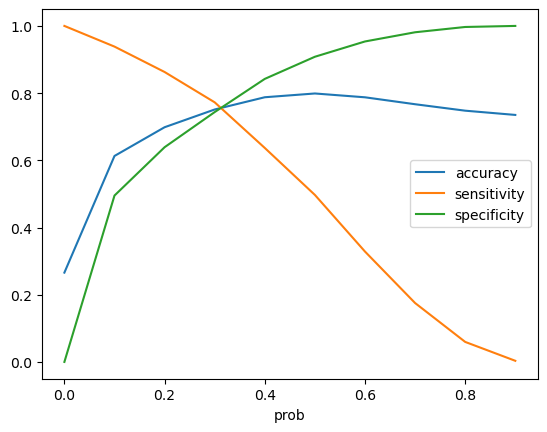

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

### From the curve, 0.3 is the optimal point to take it as a cutoff probability 

In [126]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,1,0.346208,6030,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.326262,3410,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.251299,5483,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.009054,5524,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059006,6337,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
cm_final = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_predicted)
cm_final

array([[3071, 1059],
       [ 340, 1155]])

In [128]:
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_predicted)

0.7512888888888889

In [129]:
TN = cm_final[0,0] # True negative
TP = cm_final[1,1] # True positive
FP = cm_final[0,1] # False positive
FN = cm_final[1,0] # False negative 

In [130]:
sensitivity = TP/ float(TP+FN)
sensitivity

0.7725752508361204

In [131]:
specificity = TN/float(TN+FP)
specificity

0.7435835351089588

In [132]:
# False Positive rate
FPR = FP/float(TN+FP)
FPR

0.25641646489104114

In [133]:
# Positive Predictive value 
TP/float(FP+TP)

0.521680216802168

In [134]:
# Negative Predictive Value 
TN/ float(TN+FN)

0.900322486074465

## Precision and Recall 

In [135]:
# Looking at the confusion matrix one more time to find precision and recall score 
cm3

array([[3751,  379],
       [ 752,  743]])

In [137]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [138]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.Predicted) # positive predictive value

0.6622103386809269

In [139]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.Predicted) # sensitivity 

0.49698996655518396

## Precision Recall Tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

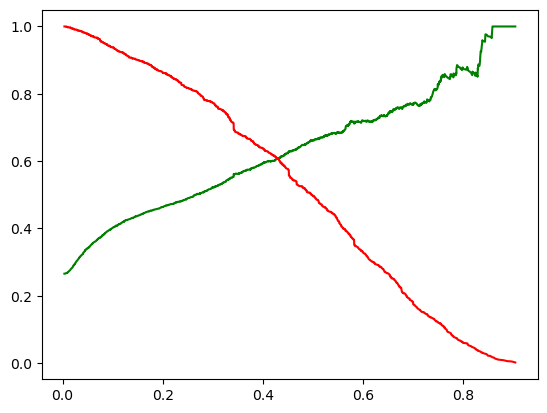

In [142]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
# Checking the metrics with the cutoff probability as 0.42

In [144]:
y_train_pred_final_pr = y_train_pred_final.copy()

In [145]:
y_train_pred_final_pr['Final_predicted_pr'] = y_train_pred_final_pr.Churn_prob.map(lambda x: 1 if x>0.42 else 0)
y_train_pred_final_pr.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Final_predicted_pr
0,1,0.346208,6030,0,1,1,1,1,0,0,0,0,0,0,1,0
1,1,0.326262,3410,0,1,1,1,1,0,0,0,0,0,0,1,0
2,1,0.251299,5483,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.009054,5524,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.059006,6337,0,1,0,0,0,0,0,0,0,0,0,0,0


In [146]:
cm_temp = confusion_matrix(y_train_pred_final_pr.Churn, y_train_pred_final_pr.Final_predicted_pr)
cm_temp

array([[3516,  614],
       [ 572,  923]])

In [147]:
accuracy_score(y_train_pred_final_pr.Churn, y_train_pred_final_pr.Final_predicted_pr)

0.7891555555555556

In [148]:
TN = cm_temp[0,0] # True negative
TP = cm_temp[1,1] # True positive
FP = cm_temp[0,1] # False positive
FN = cm_temp[1,0] # False negative 

In [149]:
TP/float(TP+FN) # sensitivity

0.6173913043478261

In [150]:
TN/float(TN+FP) # Specificity

0.8513317191283293

In [151]:
FP/float(TN+FP) # FPR

0.1486682808716707

In [152]:
TP/float(TP+FP) # Positive predictive value/ Precision 

0.6005204944697463

# Predictions on the test set 

In [153]:
col = X_train_sm.columns

In [154]:
col = col.drop('const')

In [155]:
X_test = X_test[col]
X_test.head()

,tenure,PhoneService,PaperlessBilling,SeniorCitizen,Dependents,Contract_Month-to-month,PaymentMethod_Electronic check,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1.168321,1,0,1,0,0,0,1,0,0,0,0,0
6784,-0.543522,1,0,0,0,1,0,1,0,0,0,0,0
6125,-0.788071,1,1,0,0,1,0,1,0,0,0,1,1
3052,0.190125,1,1,0,0,1,0,1,1,1,0,0,0
4099,-1.073378,0,0,0,0,1,0,0,1,1,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model3.predict(X_test_sm)
y_test_pred[:10]

2481    0.043665
6784    0.304274
6125    0.709251
3052    0.147656
4099    0.248219
3223    0.319740
3774    0.176784
3469    0.785085
3420    0.298257
1196    0.042644
dtype: float64

In [157]:
y_test_pred = y_test_pred.values.reshape(-1)

In [158]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.043665,2481
1,0,0.304274,6784
2,1,0.709251,6125
3,0,0.147656,3052
4,0,0.248219,4099


In [159]:
y_test_pred_final = y_test_pred_final.reindex(['CustID', 'Churn', 'Churn_prob'], axis = 1)
y_test_pred_final.head()

,CustID,Churn,Churn_prob
0,2481,0,0.043665
1,6784,0,0.304274
2,6125,1,0.709251
3,3052,0,0.147656
4,4099,0,0.248219


In [169]:
y_test_pred_final['Final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,CustID,Churn,Churn_prob,Final_predicted
0,2481,0,0.043665,0
1,6784,0,0.304274,1
2,6125,1,0.709251,1
3,3052,0,0.147656,0
4,4099,0,0.248219,0


In [170]:
cm_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Final_predicted)
cm_test

array([[763, 270],
       [ 94, 280]])

In [171]:
accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Final_predicted)

0.7412935323383084

In [172]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]

In [173]:
# sensitivity/recall
TP/float(TP+FN)

0.7486631016042781

In [174]:
# specificity
TN/float(TN+FP)

0.7386253630203291

In [175]:
#FPR
FPR = FP/float(FP+TN)
FPR

0.26137463697967084

In [176]:
# positive predictive value/precision 
TP/float(TP+FP)

0.509090909090909